In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [1]:
pip install pandas matplotlib seaborn jupyter

  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl.metadata (5.8 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached widgetsnbextension-4.0.13-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 16.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd

# Cargar el dataset (ajusta la ruta del archivo según corresponda)
df = pd.read_csv(r"C:\Users\Handel\Desktop\Proyecto Analisis\concerts.csv")

# Mostrar las primeras filas para entender la estructura
print(df.head())

# Información general del dataframe
print(df.info())

# Resumen estadístico de las columnas numéricas (si aplica)
print(df.describe())


                   Date       Location    Time         Venue  \
0  1842-12-07T05:00:00Z  Manhattan, NY  8:00PM  Apollo Rooms   
1  1843-02-18T05:00:00Z  Manhattan, NY  8:00PM  Apollo Rooms   
2  1843-04-07T05:00:00Z  Manhattan, NY  8:00PM  Apollo Rooms   
3  1843-04-22T05:00:00Z  Manhattan, NY  8:00PM  Apollo Rooms   
4  1843-11-18T05:00:00Z  Manhattan, NY     NaN  Apollo Rooms   

             eventType   season  programID  \
0  Subscription Season  1842-43       3853   
1  Subscription Season  1842-43       5178   
2              Special  1842-43      10785   
3  Subscription Season  1842-43       5887   
4  Subscription Season  1843-44        305   

                                  orchestra  \
0                     New York Philharmonic   
1                     New York Philharmonic   
2  Musicians from the New York Philharmonic   
3                     New York Philharmonic   
4                     New York Philharmonic   

                                     id  
0  38e072a7-8

In [11]:
# Revisa valores nulos
print(df.isnull().sum())

# Eliminar filas duplicadas, si las hay
df = df.drop_duplicates()

Date           0
Location      19
Time         771
Venue         55
eventType     17
season         0
programID      0
orchestra      2
id             0
dtype: int64


In [13]:
df = df.assign(
    Location=df["Location"].fillna("Desconocido"),
    Time=df["Time"].fillna("00:00"),
    Venue=df["Venue"].fillna("No especificado"),
    eventType=df["eventType"].fillna("Sin definir"),
    orchestra=df["orchestra"].fillna("Sin información")
)

In [14]:
print(df.isnull().sum())

Date         0
Location     0
Time         0
Venue        0
eventType    0
season       0
programID    0
orchestra    0
id           0
dtype: int64


In [15]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 21538 entries, 0 to 21606
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       21538 non-null  object
 1   Location   21538 non-null  object
 2   Time       21538 non-null  object
 3   Venue      21538 non-null  object
 4   eventType  21538 non-null  object
 5   season     21538 non-null  object
 6   programID  21538 non-null  int64 
 7   orchestra  21538 non-null  object
 8   id         21538 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.6+ MB
None
                   Date       Location    Time         Venue  \
0  1842-12-07T05:00:00Z  Manhattan, NY  8:00PM  Apollo Rooms   
1  1843-02-18T05:00:00Z  Manhattan, NY  8:00PM  Apollo Rooms   
2  1843-04-07T05:00:00Z  Manhattan, NY  8:00PM  Apollo Rooms   
3  1843-04-22T05:00:00Z  Manhattan, NY  8:00PM  Apollo Rooms   
4  1843-11-18T05:00:00Z  Manhattan, NY   00:00  Apollo Rooms   

             eventType   sea

In [17]:
print(df.columns)

Index(['Date', 'Location', 'Time', 'Venue', 'eventType', 'season', 'programID',
       'orchestra', 'id'],
      dtype='object')


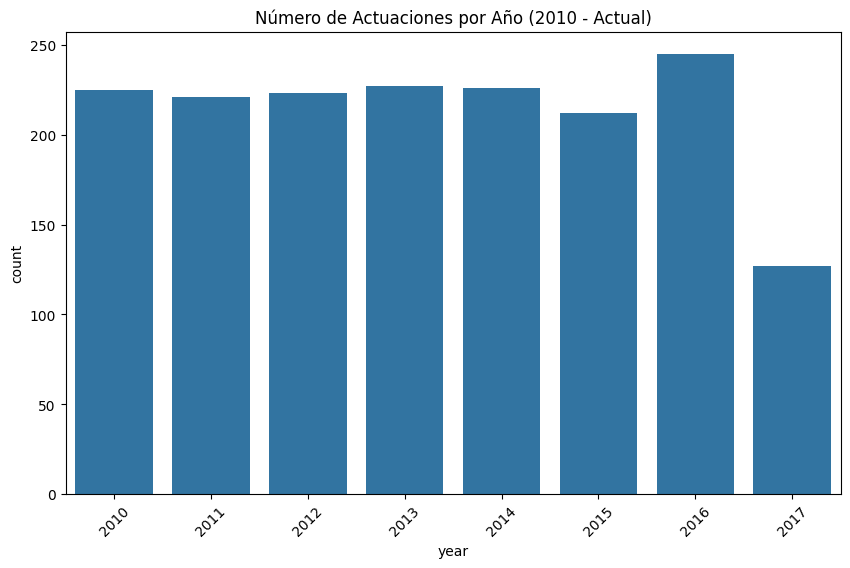

In [19]:
# Obtener el año actual
import datetime
current_year = datetime.datetime.now().year

# Filtrar los datos para que solo incluyan los años entre 2010 y el año actual
df_filtered = df[df['year'] >= 2010]

# Crear el gráfico
plt.figure(figsize=(10,6))
sns.countplot(x='year', data=df_filtered)
plt.title('Número de Actuaciones por Año (2010 - Actual)')
plt.xticks(rotation=45)
plt.show()

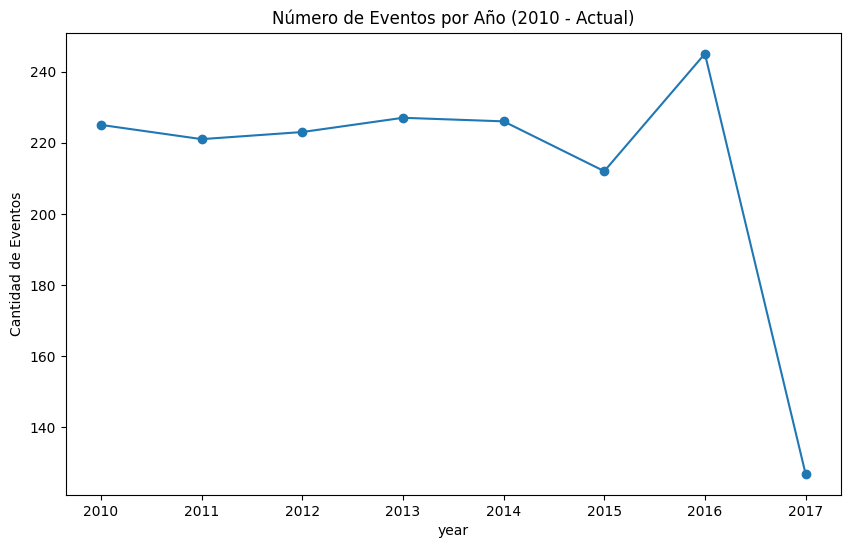

In [21]:
# Gráfico de líneas mostrando la cantidad de eventos por año
events_per_year = df_filtered.groupby('year').size()
plt.figure(figsize=(10,6))
events_per_year.plot(kind='line', marker='o')
plt.title('Número de Eventos por Año (2010 - Actual)')
plt.ylabel('Cantidad de Eventos')
plt.show()

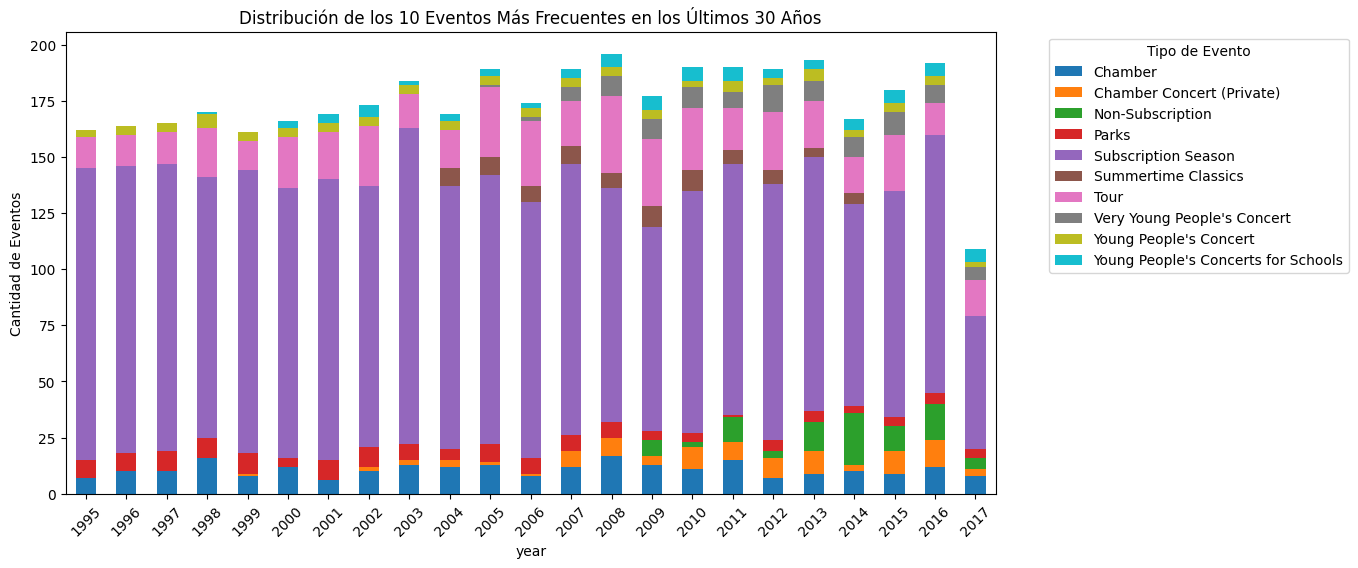

In [29]:
# Obtener el año actual
current_year = datetime.datetime.now().year

# Filtrar solo los últimos 30 años
df_filtered = df[df['year'] >= (current_year - 30)]

# Obtener los 10 eventos más frecuentes en los últimos 30 años
top_events = df_filtered['eventType'].value_counts().nlargest(10).index  

# Filtrar el DataFrame para incluir solo esos 10 eventos
df_filtered = df_filtered[df_filtered['eventType'].isin(top_events)]

# Agrupar por año y tipo de evento
event_counts = df_filtered.groupby(['year', 'eventType']).size().unstack().fillna(0)

# Crear el gráfico de barras apiladas
event_counts.plot(kind='bar', stacked=True, figsize=(12,6))

# Personalizar el gráfico
plt.title('Distribución de los 10 Eventos Más Frecuentes en los Últimos 30 Años')
plt.ylabel('Cantidad de Eventos')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Evento', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda afuera
plt.show()

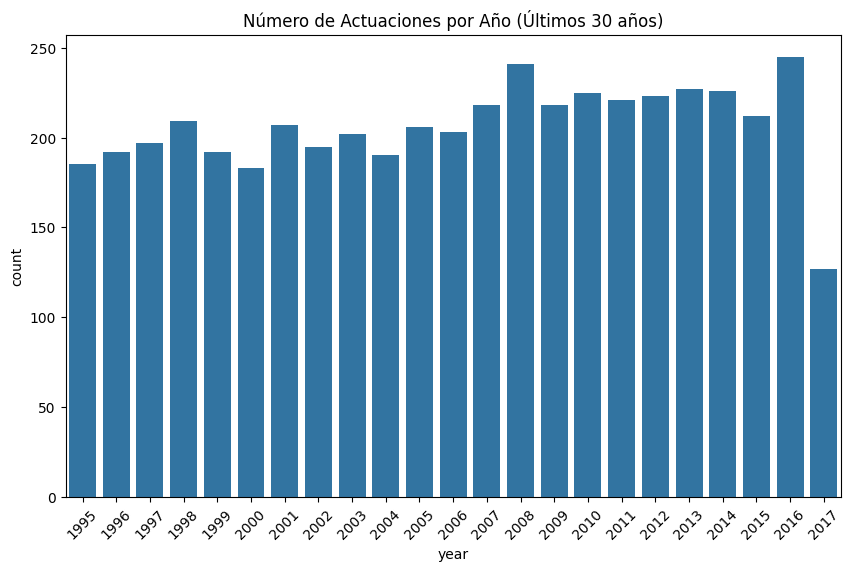

In [4]:
# Cargar el DataFrame desde un archivo CSV (ajusta la ruta según corresponda)
df = pd.read_csv(r"C:\Users\Handel\Desktop\Proyecto Analisis\archive\concerts.csv")

# Convertir la columna 'Date' a formato datetime y extraer el año
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year

# Obtener el año actual y calcular el límite (últimos 30 años)
current_year = datetime.datetime.now().year
min_year = current_year - 30

# Filtrar el DataFrame para obtener solo los datos de los últimos 30 años
df_last30 = df[df['year'] >= min_year]

# Crear el gráfico con los datos filtrados
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df_last30)
plt.title('Número de Actuaciones por Año (Últimos 30 años)')
plt.xticks(rotation=45)
plt.show()

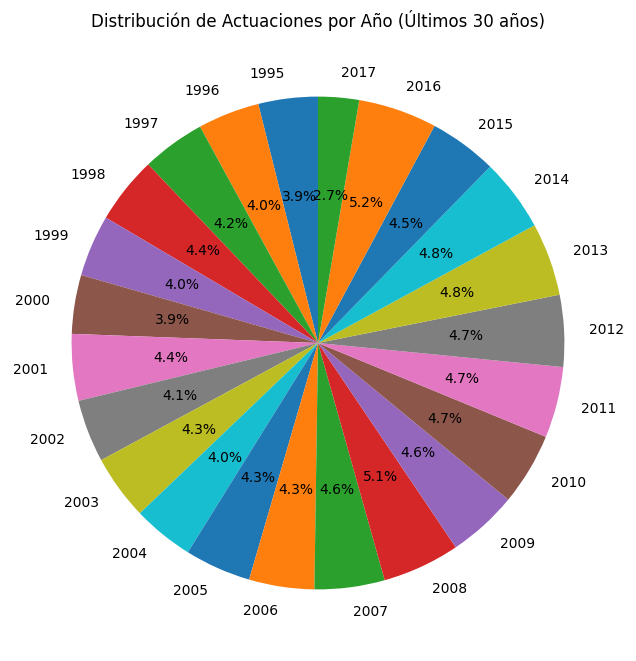

In [5]:
# Cargar el DataFrame desde el archivo CSV (ajusta la ruta si es necesario)
df = pd.read_csv(r"C:\Users\Handel\Desktop\Proyecto Analisis\concerts.csv")

# Convertir la columna 'Date' a tipo datetime y extraer el año
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year

# Obtener el año actual y definir el rango de los últimos 30 años
current_year = datetime.datetime.now().year
min_year = current_year - 30

# Filtrar el DataFrame para incluir solo los datos de los últimos 30 años
df_last30 = df[df['year'] >= min_year]

# Agrupar por año y contar el número de actuaciones por cada uno
year_counts = df_last30['year'].value_counts().sort_index()

# Crear el gráfico en pastel
plt.figure(figsize=(8,8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Actuaciones por Año (Últimos 30 años)')
plt.show()

In [11]:
df.to_csv('perf_history_clean.csv', index=False)